In [45]:
"""
CLAB Task-1: Harris Corner Detector
Your name (Your uniID):
"""

import numpy as np
from skimage.feature import corner_peaks,corner_harris
import cv2
import random

def conv2(img, conv_filter):
    # flip the filter
    f_siz_1, f_size_2 = conv_filter.shape
    conv_filter = conv_filter[range(f_siz_1 - 1, -1, -1), :][:, range(f_siz_1 - 1, -1, -1)]
    pad = (conv_filter.shape[0] - 1) // 2
    result = np.zeros((img.shape))
    img = np.pad(img, ((pad, pad), (pad, pad)), 'constant', constant_values=(0, 0))
    filter_size = conv_filter.shape[0]
    for r in np.arange(img.shape[0] - filter_size + 1):
        for c in np.arange(img.shape[1] - filter_size + 1):
            curr_region = img[r:r + filter_size, c:c + filter_size]
            curr_result = curr_region * conv_filter
            conv_sum = np.sum(curr_result)  # Summing the result of multiplication.
            result[r, c] = conv_sum  # Saving the summation in the convolution layer feature map.

    return result


In [46]:

def fspecial(shape=(3, 3), sigma=0.5):
    m, n = [(ss - 1.) / 2. for ss in shape]
    y, x = np.ogrid[-m:m + 1, -n:n + 1]
    h = np.exp(-(x * x + y * y) / (2. * sigma * sigma))
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

In [47]:
# Parameters, add more if needed
sigma = 2
thresh = 0.07

# Derivative masks
dx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
dy = dx.transpose()

In [61]:
import matplotlib.pyplot as plt
from PIL import Image
from skimage.io import imread
bw = imread('Harris_2.jpg')
from skimage.color import rgb2gray
bw=rgb2gray(bw)
bw= (bw * 255).astype(int)
# computer x and y derivatives of image
Ix = conv2(bw, dx)
Iy = conv2(bw, dy)

In [62]:
g = fspecial((max(1, np.floor(3 * sigma) * 2 + 1), max(1, np.floor(3 * sigma) * 2 + 1)), sigma)
print(g.shape)

(13, 13)


In [63]:
Iy2 = conv2(np.power(Iy, 2), g)
Ix2 = conv2(np.power(Ix, 2), g)
Ixy = conv2(Ix * Iy, g)

In [49]:
######################################################################
# Task: Compute the Harris Cornerness
######################################################################

img_1 = bw.copy()


def cornerness(img,window_size):
#     det= Ix2 * Iy2 - (Ixy**2)
#     tr= Ix2 + Iy2

#     R = det - thresh * (tr ** 2)
    R = np.zeros((img.shape[0]-window_size + 1,img.shape[1]-window_size +1))
    height = R.shape[0]
    width = R.shape[1]
    for y in range(height):
        for x in range(width):
            Sxx = np.sum(Ix2[y:y + window_size , x : x+window_size])
            Syy = np.sum(Iy2[y:y + window_size , x : x+window_size])
            Sxy = np.sum(Ixy[y:y + window_size , x : x+window_size])
            det= Sxx * Syy - (Sxy**2)
            tr= Sxx + Syy
            response = det - thresh * (tr ** 2)
            R[y,x] = response
    return R




In [50]:

def nonMaximalSupress(image,kernel_size):
    M, N= image.shape
    local=[]
    coord=[]
    for x in range(0,M-2):
        for y in range(0,N-2):
            window = image[x:x+kernel_size, y:y+kernel_size]
            localMax = np.amax(window)
            
            if localMax >R[R>0].mean():
                maxCoord = list(np.unravel_index(np.argmax(window, axis=None), window.shape))
                maxCoord[0]+=x
                maxCoord[1]+=y
                
                coord.append(maxCoord)
                local.append(localMax)
    coord_matrix = np.reshape(coord,(len(coord),2))
                
            
    return coord_matrix

In [51]:
R = cornerness(img_1,3)
corner_coords= nonMaximalSupress(R,3)

In [65]:
im= np.array(Image.open('Harris_1.jpg'))
print(im.shape)
# radius = 1
# thickness = -2
# color = (255,0,0)
# for i in corner_coords:
#     image = cv2.circle(im,(i[1],i[0]), radius, color, thickness)
# plt.imshow(image)
# for i in corner_coords:
#     im[i[0],i[1]]=[255,0,0]
# plt.imshow(im)
#cy =Image.fromarray(im)
#cy.save("Corner_4.jpg")

(370, 492, 3)


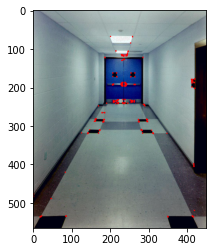

In [56]:
image = cv2.imread('Harris_4.jpg') 

operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
operatedImage = np.float32(operatedImage) 
dest = cv2.cornerHarris(operatedImage, 2,3, 0.07) 
dest = cv2.dilate(dest, None) 
image[dest > 0.01 * dest.max()]=[255, 0,0] 
plt.imshow(image) 
Image.fromarray(image).save("Cv2 corner_2.jpg")

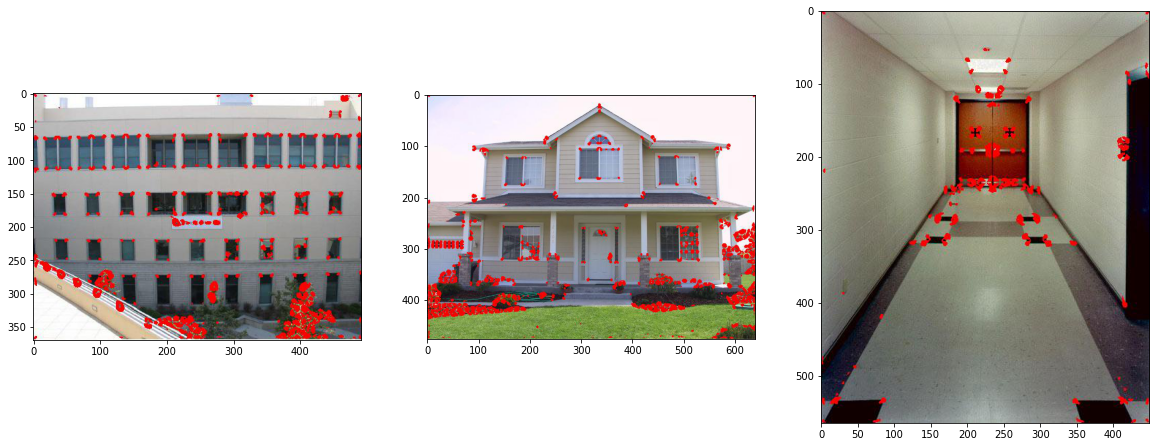

In [134]:
# fig,axes = plt.subplots(1,3 , figsize = (20,10))
# output_1=np.array(Image.open('Corner_1.jpg'))
# output_3=np.array(Image.open('Corner_3.jpg'))
# output_4=np.array(Image.open('Corner_4.jpg'))


# axes[0].imshow(output_1)
# axes[1].imshow(output_3)
# axes[2].imshow(output_4)

Text(0.5, 1.0, 'Inbuilt Harris')

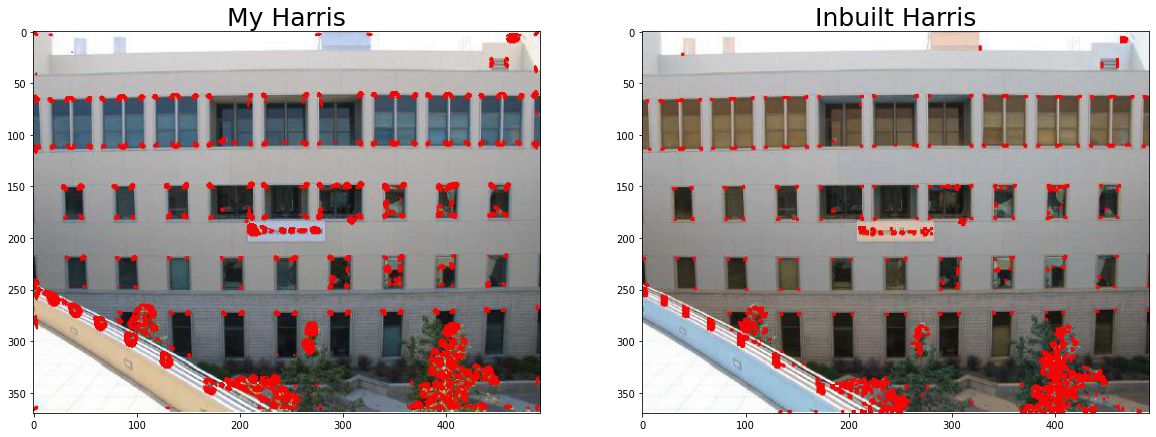

In [34]:
output_1=np.array(Image.open('Corner_1.jpg'))
output_3=np.array(Image.open('Corner_3.jpg'))
output_4=np.array(Image.open('Corner_4.jpg'))
fig,axes = plt.subplots(1,2 , figsize = (20,10))
inbuilt_1 =np.array(Image.open('Cv2 corner_1.jpg'))

axes[0].imshow(output_1)
axes[0].set_title("My Harris",fontsize = 25)
axes[1].imshow(inbuilt_1)
axes[1].set_title("Inbuilt Harris",fontsize =25)


Text(0.5, 1.0, 'Inbuilt Harris')

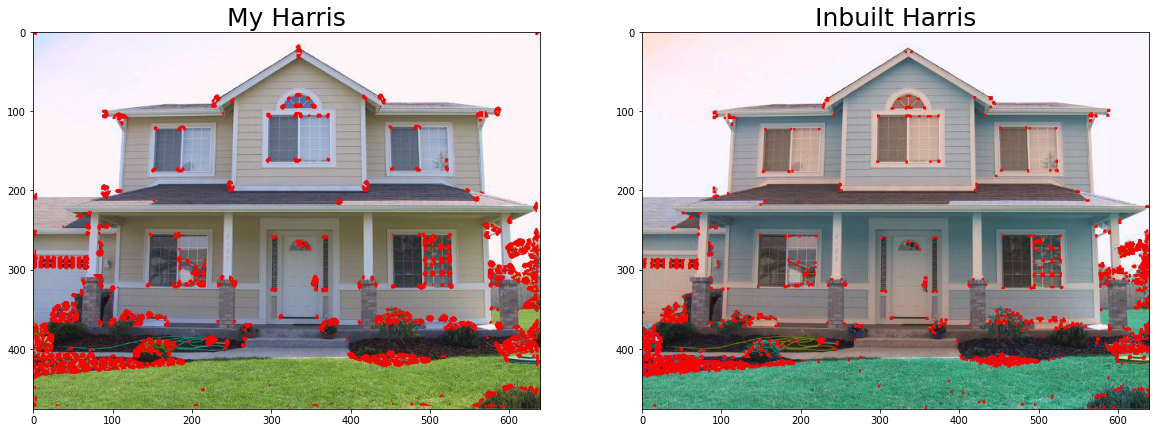

In [35]:
fig,axes = plt.subplots(1,2 , figsize = (20,10))
inbuilt_3 =np.array(Image.open('Cv2 corner_3.jpg'))

axes[0].imshow(output_3)
axes[0].set_title("My Harris",fontsize = 25)
axes[1].imshow(inbuilt_3)
axes[1].set_title("Inbuilt Harris",fontsize = 25)


Text(0.5, 1.0, 'Inbuilt Harris')

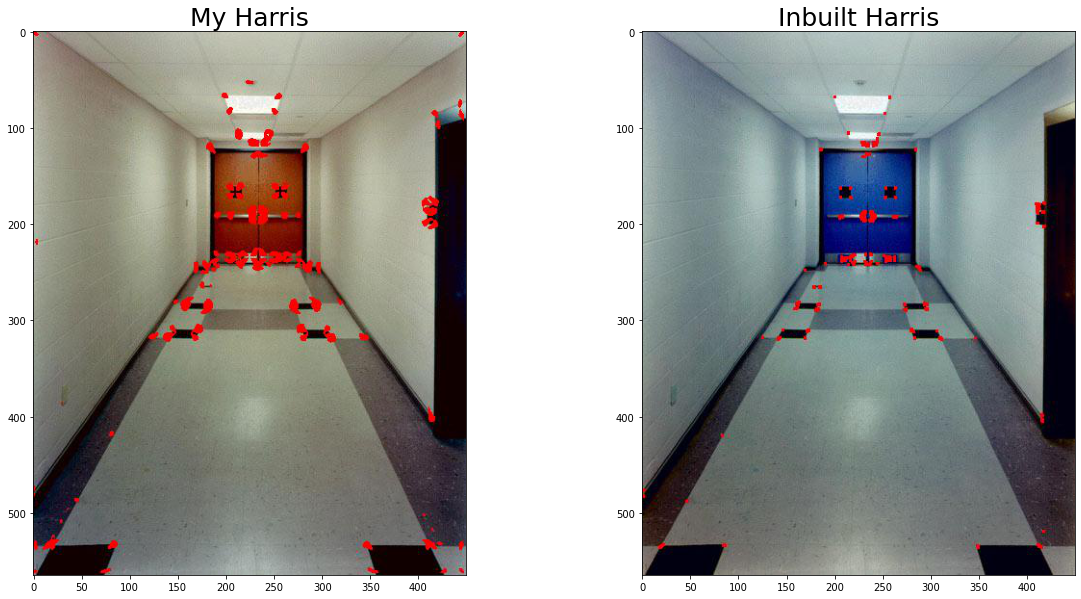

In [36]:
fig,axes = plt.subplots(1,2 , figsize = (20,10))
inbuilt_4 =np.array(Image.open('Cv2 corner_4.jpg'))

axes[0].imshow(output_4)
axes[0].set_title("My Harris",fontsize = 25)
axes[1].imshow(inbuilt_4)
axes[1].set_title("Inbuilt Harris",fontsize =25)

In [34]:
corner_coords

array([[  1,   1],
       [  1,   1],
       [  1,   2],
       ...,
       [368, 489],
       [368, 490],
       [368, 490]])

In [19]:
R =cornerness(Ix2,Iy2,Ixy,thresh)
R

array([[9.85729832e+08, 1.20157806e+09, 9.26161438e+08, ...,
        1.67956019e+09, 2.17970099e+09, 1.78820360e+09],
       [1.19944652e+09, 1.51461154e+09, 1.24042272e+09, ...,
        2.25430237e+09, 2.75318048e+09, 2.18007817e+09],
       [9.22800951e+08, 1.23812489e+09, 1.08124957e+09, ...,
        1.96894456e+09, 2.25481808e+09, 1.67989840e+09],
       ...,
       [1.95826398e+09, 2.63188616e+09, 2.30231726e+09, ...,
        3.61018440e+08, 4.64393781e+08, 3.80665179e+08],
       [2.53927148e+09, 3.20933795e+09, 2.63058415e+09, ...,
        3.77415184e+08, 5.12660161e+08, 4.32798740e+08],
       [2.08534708e+09, 2.54273332e+09, 1.95977517e+09, ...,
        2.74090942e+08, 3.90554778e+08, 3.37435235e+08]])

In [64]:
j = np.array(Image.open('Harris_2.jpg'))
R = cornerness(j,3)
corner_coords= nonMaximalSupress(R,3)

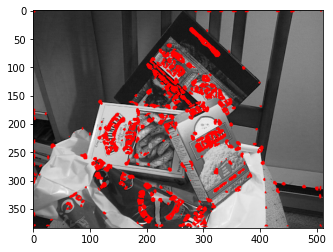

In [68]:
im = cv2.imread('Harris_2.jpg')
for i in corner_coords:
     im[i[0],i[1]]=[255,0,0]
plt.imshow(im)
cy =Image.fromarray(im)
cy.save("Corner_2.jpg")